<a href="https://colab.research.google.com/github/NimashaSavindi/Diabetes_Risk_Prediction/blob/main/Diabetes_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv("/content/Diabetes Risk Assessment – Anonymous Health Survey  (Responses) - Form Responses 2.csv")

In [2]:
print(df.shape)

(195, 15)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Column 1                                                                      195 non-null    object
 1   Age                                                                           195 non-null    int64 
 2   Gender                                                                        195 non-null    object
 3   Weight(kg)                                                                    195 non-null    object
 4   Height(cm)                                                                    195 non-null    object
 5   Physical Activity Level                                                       195 non-null    object
 6     How would you describe your typical diet

In [4]:
df.columns = df.columns.str.strip()

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Column 1                                                                      195 non-null    object
 1   Age                                                                           195 non-null    int64 
 2   Gender                                                                        195 non-null    object
 3   Weight(kg)                                                                    195 non-null    object
 4   Height(cm)                                                                    195 non-null    object
 5   Physical Activity Level                                                       195 non-null    object
 6   How would you describe your typical diet? 

In [6]:
df["Height(cm)"] = df["Height(cm)"].str.extract(r'(\d+\.?\d*)').astype(float)
df["Weight(kg)"] = df["Weight(kg)"].str.extract(r'(\d+\.?\d*)').astype(float)

In [7]:
print(df["Average hours of sleep per night"].unique())

['6-7' '6' '5-6 hr' '5' '5-6h' '7' '5 hours' '4hours' '3 hours per day '
 '4 - 6 hours' '6 hours ' '8' '4/5 hours ' '7 hours' '5 or 6' '5hr' '9'
 '8hr' '6 hours' '5 hours ' '6 Hours' '6 h' '5h' '7h' '4h' '6h' '4' '3'
 '3h']


In [8]:
df["Average hours of sleep per night"] = df["Average hours of sleep per night"].astype(str).str.strip()

sleep_mapping = {
    "Less than 5 hours": 4.5,
    "More than 8 hours": 9,
    "5-6": 5.5,
    "5-6 hr": 5.5,
    "6-7": 6.5,
    "6-7 hours": 6.5,
    "6": 6,
    "7-8": 7.5,
    "7-8 hours": 7.5,
    "7": 7,
    "8": 8,
    "9": 9
}

df["Average hours of sleep per night"] = df["Average hours of sleep per night"].replace(sleep_mapping)

In [9]:
df["Average hours of sleep per night"] = df["Average hours of sleep per night"].astype(str).str.strip().str.lower()

In [10]:
import re

def clean_sleep_value(val):
    val = val.strip().lower()

    # Handle known string patterns first
    if "less" in val:
        return 4.5
    if "more" in val:
        return 9
    if "or" in val:
        return sum([int(x) for x in re.findall(r'\d+', val)]) / 2
    if re.match(r'^\d+$', val):  # simple numeric
        return float(val)

    # Extract numbers from ranges like "5-6", "4 - 6 hours"
    nums = re.findall(r'\d+', val)
    if len(nums) == 1:
        return float(nums[0])
    elif len(nums) == 2:
        return sum([int(n) for n in nums]) / 2
    else:
        return None  # fallback if we can't parse it

In [11]:
df["Average hours of sleep per night"] = df["Average hours of sleep per night"].apply(clean_sleep_value)


In [12]:
print(df["Average hours of sleep per night"].unique())
print(df["Average hours of sleep per night"].dtype)

[5.5 6.  5.  7.  4.  3.  8.  4.5 9. ]
float64


In [13]:
# Create BMI Feature
df["Height(m)"] = df["Height(cm)"] / 100
df["BMI"] = df["Weight(kg)"] / (df["Height(m)"]**2)

df.head()

,Column 1,Age,Gender,Weight(kg),Height(cm),Physical Activity Level,How would you describe your typical diet?,Do you have a family history of diabetes?,Have you been diagnosed with hypertension(high blood pressure)?,Have you been diagnosed with heart disease?,Smoking Habits?,Average hours of sleep per night,Alcohol Consumption,Do you usually eat your meals at regular times each day?,How often do you feel stressed or emotionally overwhelmed in a typical week?,Height(m),BMI
0,7/12/2025 20:42:04,24,Female,48.0,157.0,Low (Little to no regular physical activity),"Unhealthy (Mostly high-sugar, high-fat, or pro...",No,No,No,I do not smoke,5.5,None (I do not drink alcohol),I often skip meals,Sometimes,1.57,19.473407
1,7/12/2025 21:09:42,24,Female,45.0,165.0,Low (Little to no regular physical activity),Moderately Healthy (Mixed diet with occasional...,No,No,No,I do not smoke,6.0,None (I do not drink alcohol),"No, meal times vary",Sometimes,1.65,16.528926
2,7/12/2025 21:13:29,25,Female,64.0,163.0,Moderate – Some physical activity 1–3 days a w...,Moderately Healthy (Mixed diet with occasional...,No,No,yes,I do not smoke,5.0,None (I do not drink alcohol),"No, meal times vary",Often,1.63,24.088223
3,7/12/2025 21:14:58,26,Female,52.0,157.0,Moderate – Some physical activity 1–3 days a w...,Moderately Healthy (Mixed diet with occasional...,Yes,No,No,I do not smoke,5.0,None (I do not drink alcohol),"No, meal times vary",Sometimes,1.57,21.096191
4,7/12/2025 21:25:54,25,Female,48.0,149.0,Moderate – Some physical activity 1–3 days a w...,"Healthy (Balanced diet with mix of carbs, prot...",No,No,No,I do not smoke,5.5,None (I do not drink alcohol),"Yes, mostly at the same time",Sometimes,1.49,21.620648


In [14]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")

Removed 0 duplicate rows.


In [15]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60, 100], labels=["20s", "30s", "40s", "50s", "60+"])

In [16]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

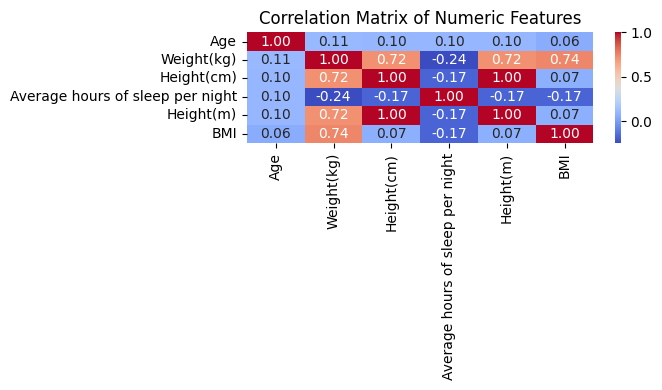

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["AgeGroup"] = le.fit_transform(df["AgeGroup"].astype(str))


In [19]:

categorical_cols = [
    "Gender",
    "Physical Activity Level",
    "How would you describe your typical diet?",
    "Do you have a family history of diabetes?",
    "Have you been diagnosed with hypertension(high blood pressure)?",
    "Have you been diagnosed with heart disease?",
    "Smoking Habits?",
    "Alcohol Consumption",
    "Do you usually eat your meals at regular times each day?",
    "How often do you feel stressed or emotionally overwhelmed in a typical week?",
]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [20]:
target = df["Do you have a family history of diabetes?_Yes"]
features = df.drop(columns=["Do you have a family history of diabetes?_Yes"])

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cols = ["Age", "BMI", "Average hours of sleep per night", "Weight(kg)", "Height(cm)"]

df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [22]:
# Show all columns of object or category dtype
categorical_candidates = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Possible categorical features:", categorical_candidates)

# Then exclude the ones you already encoded
other_categorical_features = [col for col in categorical_candidates if col not in categorical_cols]
print("Other categorical features to encode:", other_categorical_features)


Possible categorical features: ['Column 1']
Other categorical features to encode: ['Column 1']


In [23]:
X_train = pd.read_csv("/content/Diabetes Risk Assessment – Anonymous Health Survey  (Responses) - Form Responses 2.csv")

In [24]:
X_train.columns = X_train.columns.str.strip()  # remove leading/trailing spaces

In [25]:
df.to_csv('preprocessed_data.csv', index=False)

In [26]:
from google.colab import files
files.download('preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

In [28]:
print(df.columns.tolist())

['Column 1', 'Age', 'Weight(kg)', 'Height(cm)', 'Average hours of sleep per night', 'Height(m)', 'BMI', 'AgeGroup', 'Gender_Male', 'Gender_male', 'Physical Activity Level_Low (Little to no regular physical activity)', 'Physical Activity Level_Moderate – Some physical activity 1–3 days a week (e.g., walking, light exercise)', 'How would you describe your typical diet?_Moderately Healthy (Mixed diet with occasional healthy meals and some fast food or processed items)', 'How would you describe your typical diet?_Unhealthy (Mostly high-sugar, high-fat, or processed foods with few fruits/vegetables)', 'Do you have a family history of diabetes?_Yes', 'Have you been diagnosed with hypertension(high blood pressure)?_Yes', 'Have you been diagnosed with hypertension(high blood pressure)?_yes', 'Have you been diagnosed with heart disease?_Yes', 'Have you been diagnosed with heart disease?_yes', 'Smoking Habits?_3-6 times per week', 'Smoking Habits?_I do not smoke', 'Smoking Habits?_Occasionally (

In [94]:
df['Diabetes_Risk'] = (
    # Rule 1: Diet Unhealthy AND Activity Low
    (df['How would you describe your typical diet?_Unhealthy (Mostly high-sugar, high-fat, or processed foods with few fruits/vegetables)'] == 1) &
    (df['Physical Activity Level_Low (Little to no regular physical activity)'] == 1) |

    # Rule 2: Poor Sleep (<5 hours) AND High Stress
    (df['AgeGroup'] < 5.0) &
    (df['How often do you feel stressed or emotionally overwhelmed in a typical week?_Often'] == 1) |

    # Rule 3: Smoking 3–6 times per week
    (df['Smoking Habits?_3-6 times per week'] == 1) |

    # Rule 4: Irregular meals AND Unhealthy diet
    (df['Do you usually eat your meals at regular times each day?_No, meal times vary'] == 1) &
    (df['How would you describe your typical diet?_Unhealthy (Mostly high-sugar, high-fat, or processed foods with few fruits/vegetables)'] == 1) |

    # Rule 5: Family history of diabetes
    (df['Do you have a family history of diabetes?_Yes'] == 1) |

    # Rule 6: Heart disease or Hypertension
    (df['Have you been diagnosed with heart disease?_Yes'] == 1) |
    (df['Have you been diagnosed with hypertension(high blood pressure)?_Yes'] == 1) |

    # Rule 8: Alcohol Occasional AND Smoking Occasional
    (df['Alcohol Consumption_Occasional (e.g., social drinking, 1–2 times per month)'] == 1) &
    (df['Smoking Habits?_Occasionally (Less than once a week)'] == 1)
).astype(int)


In [95]:
print(df['Diabetes_Risk'].value_counts())

Diabetes_Risk
1    144
0     51
Name: count, dtype: int64


In [96]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [97]:
# Set target
target = 'Diabetes_Risk'

# Set features (drop the label column itself)
X = df.drop(columns=[target])

# Keep only numeric/binary columns
X = X.select_dtypes(include=['int64', 'float64', 'bool'])

# Convert all bools to int
X = X.astype(int)

# Target
y = df[target]

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Build the model according to grid search best parameters
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(X_train.shape[1],)))

# num_layers = 1 means only the first hidden layer (already added above)
# So no extra hidden layers are added here

model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Parameters from grid search
batch_size = 16
epochs = 50
activation = 'sigmoid'
loss = 'binary_crossentropy'
optimizer = Adam()  # Default SGD optimizer; you can customize learning rate, momentum, etc.

# Build model based on best params
model = Sequential()

# Input layer + first hidden layer
# Assuming input_dim = number of features in your dataset, e.g., 15
input_dim = X_train.shape[1]  # replace X_train with your training data variable

# Because num_layers=1 means 1 hidden layer + output layer
model.add(Dense(32, activation=activation, input_dim=input_dim))  # 16 neurons (example)

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))  # sigmoid activation for binary output

# Compile model
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6570 - loss: 0.6399 - val_accuracy: 0.6250 - val_loss: 0.6669
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7724 - loss: 0.5751 - val_accuracy: 0.6562 - val_loss: 0.6526
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7560 - loss: 0.5735 - val_accuracy: 0.6562 - val_loss: 0.6428
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7156 - loss: 0.5776 - val_accuracy: 0.6562 - val_loss: 0.6345
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7701 - loss: 0.5311 - val_accuracy: 0.6562 - val_loss: 0.6278
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7670 - loss: 0.5131 - val_accuracy: 0.6562 - val_loss: 0.6221
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7786 - loss: 0.4844 - val_accuracy: 0.6562 - val_loss: 0.6160
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7139 - loss: 0.5404 - val_accuracy: 0.6562 - val_loss: 0.6091


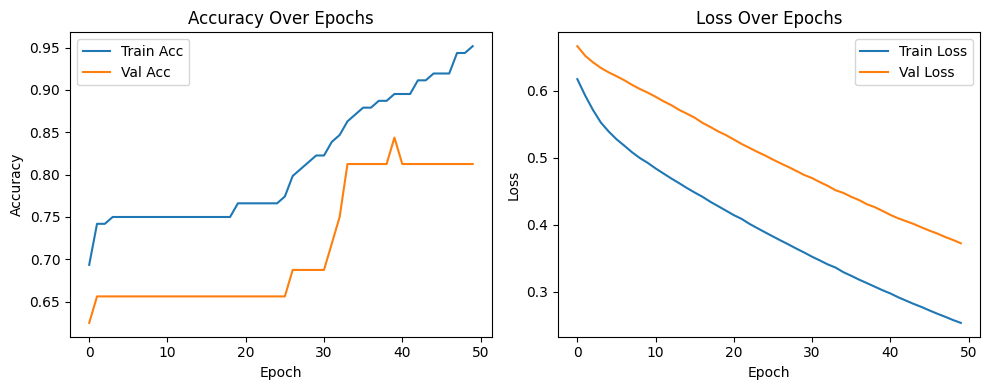

In [101]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Test Accuracy: 0.9487179487179487


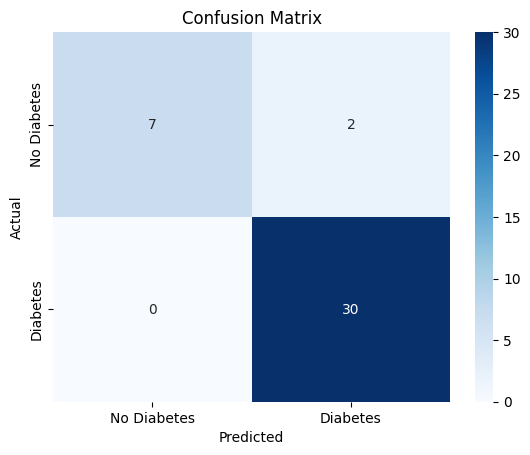

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.94      1.00      0.97        30

    accuracy                           0.95        39
   macro avg       0.97      0.89      0.92        39
weighted avg       0.95      0.95      0.95        39



In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions on test set (probabilities)
y_pred_probs = model.predict(X_test)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [103]:
print(df.columns.tolist())

['Column 1', 'Age', 'Weight(kg)', 'Height(cm)', 'Average hours of sleep per night', 'Height(m)', 'BMI', 'AgeGroup', 'Gender_Male', 'Gender_male', 'Physical Activity Level_Low (Little to no regular physical activity)', 'Physical Activity Level_Moderate – Some physical activity 1–3 days a week (e.g., walking, light exercise)', 'How would you describe your typical diet?_Moderately Healthy (Mixed diet with occasional healthy meals and some fast food or processed items)', 'How would you describe your typical diet?_Unhealthy (Mostly high-sugar, high-fat, or processed foods with few fruits/vegetables)', 'Do you have a family history of diabetes?_Yes', 'Have you been diagnosed with hypertension(high blood pressure)?_Yes', 'Have you been diagnosed with hypertension(high blood pressure)?_yes', 'Have you been diagnosed with heart disease?_Yes', 'Have you been diagnosed with heart disease?_yes', 'Smoking Habits?_3-6 times per week', 'Smoking Habits?_I do not smoke', 'Smoking Habits?_Occasionally (

In [104]:
df.head()

,Column 1,Age,Weight(kg),Height(cm),Average hours of sleep per night,Height(m),BMI,AgeGroup,Gender_Male,Gender_male,...,Smoking Habits?_Occasionally (Less than once a week),Smoking Habits?_Used to smoke but quit,Alcohol Consumption_None (I do not drink alcohol),"Alcohol Consumption_Occasional (e.g., social drinking, 1–2 times per month)","Do you usually eat your meals at regular times each day?_No, meal times vary","Do you usually eat your meals at regular times each day?_Yes, mostly at the same time",How often do you feel stressed or emotionally overwhelmed in a typical week?_Often,How often do you feel stressed or emotionally overwhelmed in a typical week?_Rarely,How often do you feel stressed or emotionally overwhelmed in a typical week?_Sometimes,Diabetes_Risk
0,7/12/2025 20:42:04,-0.047012,-1.116834,-0.834818,-0.041419,1.57,-0.870942,0,False,False,...,False,False,True,False,False,False,False,False,True,1
1,7/12/2025 21:09:42,-0.047012,-1.411633,0.011007,0.383667,1.65,-2.001633,0,False,False,...,False,False,True,False,True,False,False,False,True,0
2,7/12/2025 21:13:29,0.658169,0.455426,-0.200449,-0.466504,1.63,0.901164,0,False,False,...,False,False,True,False,True,False,True,False,False,1
3,7/12/2025 21:14:58,1.363349,-0.723769,-0.834818,-0.466504,1.57,-0.247787,0,False,False,...,False,False,True,False,True,False,False,False,True,1
4,7/12/2025 21:25:54,0.658169,-1.116834,-1.680642,-0.041419,1.49,-0.046393,0,False,False,...,False,False,True,False,False,True,False,False,True,0


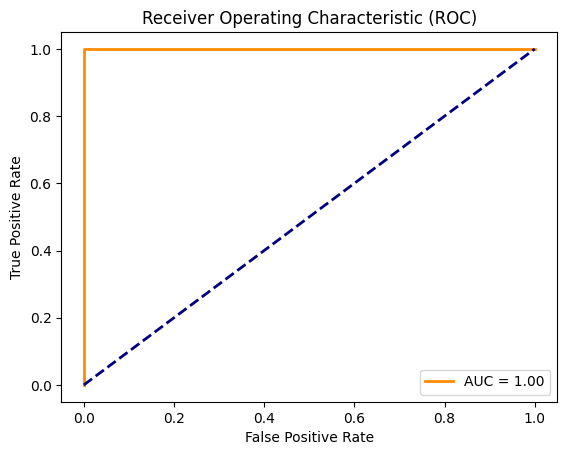

AUC Score: 1.0


In [105]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", roc_auc)

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import joblib

# -------------------------------
# 1. Define features properly
# -------------------------------
numeric_features = [
    'Age', 'Weight(kg)', 'Height(cm)', 'Height(m)', 'BMI', 'Average hours of sleep per night'
]

# all the one-hot style categorical features (exclude target + numeric + junk col)
categorical_features = [col for col in df.columns
                        if col not in numeric_features + ['Diabetes_Risk', 'Column 1']]

all_features = numeric_features + categorical_features

# -------------------------------
# 2. Separate X and y
# -------------------------------
X = df[all_features]          # <-- still a DataFrame
y = df['Diabetes_Risk']

# Train-test split (keeps DataFrame)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 3. Preprocessing
# -------------------------------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# categorical features are already dummy (0/1), so just impute missing
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"   # ignore other columns if any
)

# -------------------------------
# 4. Final model pipeline
# -------------------------------
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# -------------------------------
# 5. Train model
# -------------------------------
model.fit(X_train, y_train)

# -------------------------------
# 6. Save pipeline
# -------------------------------
joblib.dump(model, 'full_preprocessing_pipeline.pkl')
print("Pipeline trained and saved successfully!")


Pipeline trained and saved successfully!


In [45]:
expected_cols = model.named_steps["preprocessor"].get_feature_names_out()
print(expected_cols)


['num__Age' 'num__Weight(kg)' 'num__Height(cm)' 'num__Height(m)'
 'num__BMI' 'num__Average hours of sleep per night' 'cat__AgeGroup'
 'cat__Gender_Male' 'cat__Gender_male'
 'cat__Physical Activity Level_Low (Little to no regular physical activity)'
 'cat__Physical Activity Level_Moderate – Some physical activity 1–3 days a week (e.g., walking, light exercise)'
 'cat__How would you describe your typical diet?_Moderately Healthy (Mixed diet with occasional healthy meals and some fast food or processed items)'
 'cat__How would you describe your typical diet?_Unhealthy (Mostly high-sugar, high-fat, or processed foods with few fruits/vegetables)'
 'cat__Do you have a family history of diabetes?_Yes'
 'cat__Have you been diagnosed with hypertension(high blood pressure)?_Yes'
 'cat__Have you been diagnosed with hypertension(high blood pressure)?_yes'
 'cat__Have you been diagnosed with heart disease?_Yes'
 'cat__Have you been diagnosed with heart disease?_yes'
 'cat__Smoking Habits?_3-6 times

In [46]:
import joblib
import pandas as pd

# Load trained model pipeline
model = joblib.load("full_preprocessing_pipeline.pkl")

# -----------------------------------
# Collect user inputs
# -----------------------------------
print("Please enter the following details:")

age = int(input("Age (years): "))
weight = float(input("Weight (kg): "))
height_cm = float(input("Height (cm): "))
height_m = height_cm / 100
bmi = weight / (height_m ** 2)
sleep_hours = int(input("Average hours of sleep per night: "))

print("\nGender Options: Male / Female")
gender = input("Gender: ")

print("\nPhysical Activity Options:")
print("1. Low (Little to no regular physical activity)")
print("2. Moderate – Some physical activity 1–3 days a week (e.g., walking, light exercise)")
print("3. High – Regular physical activity 4+ days a week (e.g., gym, running, sports)")
activity = input("Physical Activity Level: ")

print("\nDiet Options:")
print("1. Healthy (Balanced diet with mix of carbs, proteins, vegetables, limited sugar and processed foods)")
print("2. Moderately Healthy (Mixed diet with occasional healthy meals and some fast food or processed items)")
print("3. Unhealthy (Mostly high-sugar, high-fat, or processed foods with few fruits/vegetables)")
diet = input("Typical Diet: ")

print("\nSmoking Habits:")
print("1. I do not smoke")
print("2. Used to smoke but quit")
print("3. Occasionally (Less than once a week)")
print("4. 1-2 times per week")
print("5. 3-6 times per week")
print("6. Daily(1-5 times per day)")
smoking = input("Smoking Habits: ")

print("\nAlcohol consumption:")
print("1. None (I do not drink alcohol)")
print("2. Occasional (e.g., social drinking, 1–2 times per month)")
print("3. Moderate (e.g., 1–2 times per week)")
print("4. Frequent (3 or more times per week)")
alcohol = input("Alcohol Consumption: ")

print("\n meals at regular times each day:")
print("1. Yes, mostly at the same time")
print("2. No, meal times vary")
print("3. I often skip meals")
meal_regular = input("Do you usually eat your meals at regular times each day: ")

print("\nStress level:")
print("1. Rarely")
print("2. Sometimes")
print("3. Often")
print("4. Almost every day")
stress = input("How often do you feel stressed or emotionally overwhelmed in a typical week: ")


family_history = input("Do you have a family history of diabetes? (Yes/No): ")
hypertension = input("Diagnosed with hypertension (high blood pressure)? (Yes/No): ")
heart_disease = input("Diagnosed with heart disease? (Yes/No): ")
#smoking = input("Smoking Habits? (Yes/No): ")
#alcohol = input("Alcohol Consumption (Never/Occasionally/Frequently): ")
#meal_regular = input("Do you usually eat meals at regular times? (Yes/No): ")
#stress = input("How often do you feel stressed? (Rarely/Sometimes/Often): ")

# Age group (optional - can be derived from Age, but you can also ask directly)
if age < 20:
    age_group = "<20"
elif 20 <= age <= 29:
    age_group = "20-29"
elif 30 <= age <= 39:
    age_group = "30-39"
elif 40 <= age <= 49:
    age_group = "40-49"
elif 50 <= age <= 59:
    age_group = "50-59"
else:
    age_group = "60+"

Please enter the following details:
Age (years): 25
Weight (kg): 45
Height (cm): 145
Average hours of sleep per night: 7

Gender Options: Male / Female
Gender: Male

Physical Activity Options:
1. Low (Little to no regular physical activity)
2. Moderate – Some physical activity 1–3 days a week (e.g., walking, light exercise)
3. High – Regular physical activity 4+ days a week (e.g., gym, running, sports)
Physical Activity Level: Low (Little to no regular physical activity)

Diet Options:
1. Healthy (Balanced diet with mix of carbs, proteins, vegetables, limited sugar and processed foods)
2. Moderately Healthy (Mixed diet with occasional healthy meals and some fast food or processed items)
3. Unhealthy (Mostly high-sugar, high-fat, or processed foods with few fruits/vegetables)
Typical Diet: Unhealthy (Mostly high-sugar, high-fat, or processed foods with few fruits/vegetables)

Smoking Habits:
1. I do not smoke
2. Used to smoke but quit
3. Occasionally (Less than once a week)
4. 1-2 times

In [47]:
# -----------------------------------
# Create DataFrame
# -----------------------------------
user_data = {
    "Age": age,
    "Weight(kg)": weight,
    "Height(cm)": height_cm,
    "Height(m)": height_m,
    "BMI": bmi,
    "Average hours of sleep per night": sleep_hours,
    "Gender": gender,
    "Physical Activity Level": activity,
    "How would you describe your typical diet?": diet,
    "Do you have a family history of diabetes?": family_history,
    "Have you been diagnosed with hypertension(high blood pressure)?": hypertension,
    "Have you been diagnosed with heart disease?": heart_disease,
    "Smoking Habits?": smoking,
    "Alcohol Consumption": alcohol,
    "Do you usually eat your meals at regular times each day?": meal_regular,
    "How often do you feel stressed or emotionally overwhelmed in a typical week?": stress,
    "AgeGroup": age_group
}

user_df = pd.DataFrame([user_data])

# Load training feature names from pipeline
expected_cols = model.feature_names_in_

# One-hot encode user input
user_encoded = pd.get_dummies(user_df)

# Align with expected columns (fill missing with 0)
user_encoded = user_encoded.reindex(columns=expected_cols, fill_value=0)

# Predict
prediction = model.predict(user_encoded)[0]
prediction_proba = model.predict_proba(user_encoded)[0]

# Map probabilities manually
print("Prediction:", "Yes" if prediction == 1 else "No")
print("Prediction Probabilities:")
print(f"No: {prediction_proba[0]:.2f}")
print(f"Yes: {prediction_proba[1]:.2f}")

#print("Prediction:", prediction)
#print("Prediction Probabilities:", prediction_proba)



Prediction: Yes
Prediction Probabilities:
No: 0.35
Yes: 0.65
